# Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [3]:
import pandas as pd

In [22]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [25]:
def mark(data):
    if data['rating'] <=2:
        return 'низкий рейтинг'
    if data['rating'] <=4:
        return 'средний рейтинг'
    if data['rating'] <=5:
        return 'высокий рейтинг'

In [30]:
ratings['mark'] = ratings.apply(mark, axis=1)
ratings.head(21)

,userId,movieId,rating,timestamp,mark
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг
5,1,1263,2.0,1260759151,низкий рейтинг
6,1,1287,2.0,1260759187,низкий рейтинг
7,1,1293,2.0,1260759148,низкий рейтинг
8,1,1339,3.5,1260759125,средний рейтинг
9,1,1343,2.0,1260759131,низкий рейтинг


# Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [31]:
keywords = pd.read_csv('keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [176]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']}

In [177]:
def city_searching(data):
    city = data['keyword'].lower().split(' ')
    for region in geo_data:
        for cit in city:
            if cit in geo_data[region]:
                return region
    return 'undefined'

In [178]:
keywords['region'] = keywords.apply(city_searching, axis=1)

In [179]:
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [180]:
keywords[keywords['region'] == 'Центр'].head()

,keyword,shows,region
127,авито москва,979292,Центр
849,авито ярославль,209581,Центр
1259,москва,153050,Центр
1396,гисметео москва,140279,Центр
1482,госуслуги москва,133061,Центр


In [181]:
keywords[keywords['region'] == 'Северо-Запад'].head()

,keyword,shows,region
370,авито ру санкт петербург,425134,Северо-Запад
1236,банк санкт петербург,174375,Северо-Запад
1346,санкт петербург,144232,Северо-Запад
2153,авито псков,98931,Северо-Запад
2398,авито мурманск,89787,Северо-Запад


In [182]:
keywords[keywords['region'] == 'Дальний Восток'].head()

,keyword,shows,region
1063,фарпост владивосток,176951,Дальний Восток
2175,дром хабаровск,98361,Дальний Восток
3206,дром владивосток,73084,Дальний Восток
3275,100 сп владивосток,76418,Дальний Восток
3687,авито хабаровск,63736,Дальний Восток


In [169]:
'москва'[0:4]

'моск'

# Задание 3
Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [222]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
movies_merge = pd.merge(movies, ratings, on='movieId', how='left')
movies_merge.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08


In [201]:
years=list(range(1950,2011,1))

In [288]:
def production_year(data):
    year_in_title = data['title'].replace('(', '').replace(')', '').split(' ')
    for year in years:
        for cut in year_in_title:
            try: cut = int(cut)
            except: continue
            if cut == year:
                 return year
    return 1900

In [289]:
movies_merge['year'] = movies_merge.apply(production_year, axis=1)

In [290]:
movies_merge.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08,1995


In [325]:
average_rating = movies_merge.groupby('year').mean().sort_values('rating', ascending=False)['rating']
average_rating = pd.DataFrame(average_rating).reset_index()
average_rating.head()

,year,rating
0,1957,4.014241
1,1972,4.011136
2,1952,4.000000
3,1954,3.994220
4,1951,3.983539


In [310]:
import matplotlib.pyplot as plt

In [ ]:
average_rating_plot=average_rating.sort_values('year', ascending=True)
average_rating_plot[(average_rating_plot['year']>=1950) & (average_rating_plot['year']<=2010) ]

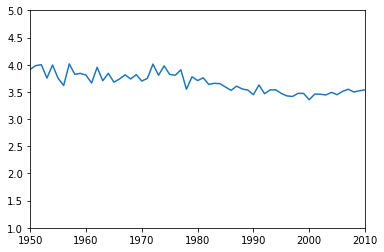

In [374]:
#Визуализация - как спобос предварительно ответа на вопрос о связи года и рейтинга
ax = plt.axes()

plt.xlim( [1950,2010]) 
plt.ylim( [1, 5] )

plt.plot(average_rating_plot['year'], average_rating_plot['rating'])

plt.show()

In [367]:
import scipy.stats as sc

In [368]:
#Статистическая проверка
#Коэффициент корреляции Спирмена действительно (на достоверном уровне статистической значимости) 
#показывает сильную отрицательную корреляцию между годом и средним рейтингом
#это интересный результат :) 
sc.stats.spearmanr(average_rating_plot['year'], average_rating_plot['rating'])

SpearmanrResult(correlation=-0.8063508851451738, pvalue=2.6023585150883905e-15)